In [3]:
import heapq 
from collections import Counter

# Final Project Huffman Compression Code
### Regular huffman encoding/decoding


In [4]:
#################################################################################
#IO Helper functions
#################################################################################
# Reads in a file and returns the text as a string
def readfile(pathname):
    with open(pathname, "r") as f:
        text = f.read()
    return text

# Counts the frequency of each character in a file and returns a dictionary
# Planning on sending in War and Peace txt, which is a large sample of the English language
def count_frequencies(pathname):
    freq = {}
    with open(pathname, "r") as f:
        for char in f.read():
            freq[char] = freq.get(char, 0) + 1
    return freq

# Class for a binary tree node. Holds a character, frequency of that character, and two children
class BTNode:
    def __init__(self, char=None, freq=0):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    # "Magic" function that allows you to use it in a priority queue
    # We are using a min queue so want to pull out lowest frequency first
    def __lt__(self, other):
        return self.freq < other.freq

# Builds the regular huffman tree from a dictionary (freqs) 
# Returns the tree and freqs for easy access
def build_huffman_tree(freqs):
    # Make a priority queue which is heapified by minimum frequency 
    priority_queue = [BTNode(ch, f) for ch, f in freqs.items()]
    heapq.heapify(priority_queue)

    # loop while it is length greater than 1, pulling out two elements and then merging them
    while(len(priority_queue) > 1):
        t1 = heapq.heappop(priority_queue)
        t2 = heapq.heappop(priority_queue)
        tree = BTNode(None, t1.freq + t2.freq) # make new tree with t1 on left, t2 on right
        tree.left = t1
        tree.right = t2
        heapq.heappush(priority_queue, tree) # add the tree back onto the priority queue and loop
    huff_tree = priority_queue[0] # return the the one remaining node, the priority tree
    return huff_tree

# recursively builds the codebook, which maps characters to their codes 
def build_codebook(node, prefix = "", codebook = None):
    if codebook is None: 
        codebook = {}
    if node.char is not None: # Base case: if we are at a leaf, add the 
        codebook[node.char] = prefix
    else:
        build_codebook(node.left, prefix + "0", codebook)
        build_codebook(node.right, prefix + "1", codebook)
    return codebook

# encodes a message given a particular codebook
def encode_message(message, codes):
    encoded_message = "".join(codes[ch] for ch in message) # uses generator expression to create encoded message
    return encoded_message

# decodes a message. Note, requires the huff_tree for decoding
def decode_message(encoded_message, huff_tree):
    result = [] # holds decoded message
    node = huff_tree
    for bit in encoded_message:
        node = node.left if bit == "0" else node.right # go left if 0, go right if 1
        if node.char is not None:  # once you get to leaf
            result.append(node.char)  # add the correct character to the decoded message
            node = huff_tree # start back at the top for next iteration
    decoded_message = "".join(result)
    return decoded_message


# Test regular Huffman tree

freqs = count_frequencies("WarAndPeace.txt") # get frequencies from file

test_text = "hello" 
basic_tree = build_huffman_tree(freqs) # build the huffman tree
basic_codes = build_codebook(basic_tree) # build the codebook
encoded = encode_message(test_text, basic_codes) # encode the test text
decoded = decode_message(encoded, basic_tree) # decode the encoded text
print("Basic Codes:", basic_codes)
print("Message:", test_text)
print("Encoded:", encoded)
print("Decoded:", decoded)
assert decoded == test_text # make sure it works

Basic Codes: {'e': '000', 's': '0010', 'h': '0011', 'i': '0100', 'p': '010100', ',': '010101', ':': '01011000000', '6': '010110000010000', '3': '010110000010001', '2': '01011000001001', 'U': '0101100000101', '*': '0101100000110', 'J': '0101100000111', 'j': '0101100001', 'z': '0101100010', 'q': '0101100011', ';': '01011001000', 'K': '01011001001', 'Y': '01011001010', 'G': '01011001011', 'R': '0101100110', '/': '0101100111000000', 'Q': '0101100111000001', '9': '0101100111000010', '7': '0101100111000011', '0': '01011001110001', 'X': '0101100111001', ')': '010110011101', '(': '010110011110', 'L': '010110011111', 'W': '0101101000', 'S': '0101101001', '-': '010110101', 'P': '010110110', 'A': '010110111', 'y': '010111', 'n': '0110', 'o': '0111', 'l': '10000', 'g': '100010', 'v': '1000110', '?': '1000111000', 'M': '1000111001', 'T': '100011101', 'O': '10001111000', '1': '1000111100100', '8': '10001111001010', '5': '1000111100101100', '4': '10001111001011010', '$': '10001111001011011000', '@': 

In [5]:

def expected_bits(freqs, codebook):
    total = sum(freqs.values()) # total number of characters
    bits_per_symbol = sum((freqs[s]/total) * len(codebook[s]) for s in freqs) # bits per symbol = sum of prob(s) * length(code(s))
    avg_chars = sum((freqs[s]/total) * (2 if len(s)==2 else 1) for s in freqs) # average originial characters per symbol is key becaus you have more total symbols with bigrams
    return bits_per_symbol / avg_chars # division gives bits per original character


# Identifies the top K bigrams from the text in terms of freqeuncy
def top_bigrams(text, K):
    counts = Counter(text[i:i+2] for i in range(len(text)-1)) # uses Counter package to count occurences of bigrams in text
    return list(bg for bg,_ in counts.most_common(K)) # returns the K most common bigrams as a list
# Computes frequencies of characters and bigrams in the text given a set of bigrams to use
def freqs_with_bigrams(text, bigram_set):
    freqs = Counter()
    i = 0
    N = len(text)
    while i < N:
        if i + 1 < N:
            two = text[i:i+2]
            if two in bigram_set:
                freqs[two] += 1
                i += 2
                continue
        freqs[text[i]] += 1
        i += 1
    return freqs

### Test how many bigrams are needed to converge asymptotically using the WarAndPeace text


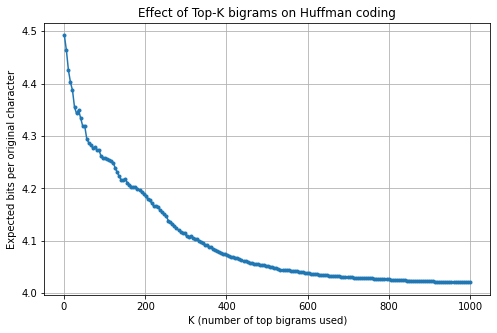

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Computes the expected bits per character

# Plots the expected bits per original character as a function of K, the number of top bigrams used
# Uses the text to compute frequencies with the top K bigrams included
def experiment_plot(text, K_values, sample_every=1):
    """
    text: input string
    K_values: iterable of K values (increasing ints) to evaluate
    sample_every: only evaluate every sample_every-th K to speed up (optional)
    """
    Ks = []
    bits = []

    # precompute a big list of top bigrams up to max K needed
    K_max = max(K_values)
    bigram_list = top_bigrams(text, K_max)

    current_set = set()
    # We'll add bigrams incrementally so we don't rebuild sets from scratch each iteration
    for i, bg in enumerate(bigram_list, start=1):
        current_set.add(bg)
        if i not in K_values:
            continue
        # compute freqs with current bigrams

        freqs = freqs_with_bigrams(text, current_set)
        # build Huffman and codebook (use your implementations)
        tree = build_huffman_tree(freqs)
        codebook = build_codebook(tree)
        # compute expected bits per original character
        bpc = expected_bits(freqs, codebook)
        Ks.append(i)
        bits.append(bpc)

    plt.figure(figsize=(8,5))
    plt.plot(Ks, bits, marker='.')
    plt.xlabel("K (number of top bigrams used)")
    plt.ylabel("Expected bits per original character")
    plt.title("Effect of Top-K bigrams on Huffman coding")
    plt.grid(True)
    plt.show()

text = readfile("WarAndPeace.txt")
# K_values = list(range(1, 1001))   # evaluate every K from 1..1000
# experiment_plot(text, K_values)

K_values = sorted(set([1] + list(np.linspace(1, 1000, 200, dtype=int))))
experiment_plot(text, K_values)

From this, we concluded that we need around 800-1000 bigrams in our huffman tree to achieve saturating benefit to the expected bits per original character. 

# Compare the number of bits used to send the test_message when using the bigram tree compared to the Huffman tree

In [6]:

# walks through the text and returns a list of symbols ready for Huffman counting to make into a tree
# importnt note: overlapping bigrams are always given priority on the left (ex: for the, th is picked over he)
def replace_bigrams(text, bigram_list):
    out = []
    i = 0
    while i < len(text):
        if i+1 < len(text) and text[i:i+2] in bigram_list: # look at next 2 elements, if in bigram list, add that combination to list
            out.append(text[i:i+2])
            i += 2
        else: # else, just add the character normally
            out.append(text[i])
            i += 1
    return out

# Create bigram tree and codebook
text = readfile("WarAndPeace.txt") 
K = 1000
bigram_list = top_bigrams(text, K)
freqs = Counter(replace_bigrams(text, bigram_list))
bigram_tree = build_huffman_tree(freqs)
bigram_codebook = build_codebook(bigram_tree)

# Test bigram Huffman tree
test_text = readfile("test_message.txt")
encoded_bigram = encode_message(replace_bigrams(test_text, bigram_list), bigram_codebook)
print("Encoded with bigrams:", len(encoded_bigram))
decoded_bigram = decode_message(encoded_bigram, bigram_tree)

assert decoded_bigram == test_text, "Bigram Decoding did not match original!"
# Test regular Huffman tree
freqs = count_frequencies("WarAndPeace.txt")
basic_tree = build_huffman_tree(freqs)
basic_codes = build_codebook(basic_tree)
encoded = encode_message(test_text, basic_codes)
print("Encoded regular:", len(encoded))
decoded = decode_message(encoded, basic_tree)
assert decoded == test_text, "Basic Decoding did not match original!"



Encoded with bigrams: 34270
Encoded regular: 38206


From the statistical analysis, we found that there is a penalty for having more bit flips in a message. Our first idea was a very simple technique called differential encoding. The final Huffman-compressed message is encoded with the diff_encode method before being sent across the noisy channel. The encoded message has only one bit of overhead compared to the original message. The receiver must decode the message before error correcting and decompressing 

In [7]:
import random
# encodes a bit string using differential encoding, reducing the number of bit flips
def diff_encode(bits, start_prev_bit=0):
    out = []
    prev = start_prev_bit
    for ch in bits:
        b = 1 if ch == "1" else 0
        d = b ^ prev
        out.append("1" if d == 1 else "0")
        prev = b
    return "".join(out)
# decodes a bit string that was encoded using differential encoding
def diff_decode(diffs, start_prev_bit=0):
    out = []
    prev = start_prev_bit
    for ch in diffs:
        d = 1 if ch == "1" else 0
        b = d ^ prev
        out.append("1" if b == 1 else "0")
        prev = b
    return "".join(out)

def encode_with_diff(message, codes, start_prev_bit=0):
    bits = encode_message(message, codes)
    # Optionally choose start_prev_bit to match the first bit to avoid initial flip
    return diff_encode(bits, start_prev_bit=start_prev_bit)

def decode_with_diff(encoded_diffs, tree, start_prev_bit=0):
    bits = diff_decode(encoded_diffs, start_prev_bit=start_prev_bit)
    return decode_message(bits, tree)
# counts the number of bit flips in a bit string
def count_bit_flips(bits):
    return sum(b1 != b2 for b1, b2 in zip(bits, bits[1:]))
#Test differential encoding
test_bits = "11111111111111111000000000000000000"
encoded_diffs = diff_encode(test_bits)
print("Original bits: ", test_bits)
print("number of bit flips in original:", count_bit_flips(test_bits))
print("Diff encoded:  ", encoded_diffs)
print("number of bit flips in encoded: ", count_bit_flips(encoded_diffs))
decoded_bits = diff_decode(encoded_diffs)
print("Diff decoded:  ", decoded_bits)
assert decoded_bits == test_bits, "Diff Decoding did not match original!"

test_cases = [
    "00000000", # no improvement compared to original
    "11111111", # no improvement compared to original
    "10101010", # maximum improvement, 7 flips to 1 flip
    "00000001", # only 1 flip, no improvement
    "111000111000",
    "".join(random.choice("01") for _ in range(50)),  # random, usually some improvement
    ""
]

for bits in test_cases:
    enc = diff_encode(bits)
    dec = diff_decode(enc)
    print(f"Original: {bits}")
    print(f"Encoded : {enc}")
    print(f"Decoded : {dec}")
    print(f"Flips before: {count_bit_flips(bits)}, after: {count_bit_flips(enc)}")
    assert dec == bits, "Mismatch in encode→decode!"
    print("-"*40)

    


Original bits:  11111111111111111000000000000000000
number of bit flips in original: 1
Diff encoded:   10000000000000000100000000000000000
number of bit flips in encoded:  3
Diff decoded:   11111111111111111000000000000000000
Original: 00000000
Encoded : 00000000
Decoded : 00000000
Flips before: 0, after: 0
----------------------------------------
Original: 11111111
Encoded : 10000000
Decoded : 11111111
Flips before: 0, after: 1
----------------------------------------
Original: 10101010
Encoded : 11111111
Decoded : 10101010
Flips before: 7, after: 0
----------------------------------------
Original: 00000001
Encoded : 00000001
Decoded : 00000001
Flips before: 1, after: 1
----------------------------------------
Original: 111000111000
Encoded : 100100100100
Decoded : 111000111000
Flips before: 3, after: 7
----------------------------------------
Original: 00110001010100111110111001111010100010101010100010
Encoded : 00101001111110100001100101000111110011111111110011
Decoded : 0011000101

After proving that it works conceptually, I wanted to get some data to show whethe, on average, the message sent has fewer bitflips. I first tried doing trials with random bits, but found that the improvement was not very effective.

Things to write about:
- default is a 0 percent mean reduction, 0 std reducion
- mean reduction is worst at 25% when only sending 2 bits. You are always increasing standard deviation of the reduction of number of bit flips with this method
- as you increase the number of bit bits, std gets worse, but then starts improving. 
- at very high number of bits, you hardly have any improvement

In [42]:
import numpy as np
def bit_flip_test(num_bits, num_trials=1000):
    reductions = []
    for _ in range(num_trials):
        bits = "".join(random.choice("01") for _ in range(num_bits)) # random string of bits 
        enc = diff_encode(bits) # encode with differential encoding
    # count bit flips before and after 
        flips_before = count_bit_flips(bits)
        flips_after = count_bit_flips(enc)
        if flips_before > 0:
            reduction = (flips_before - flips_after) / flips_before
            reductions.append(reduction)
        else:
            reductions.append(0.0)  # No flips to reduce
    mean_reduction = np.mean(reductions)*100
    std_reduction = np.std(reductions)*100
    print(f"Over {num_trials} trials of {num_bits} random bits:")
    print(f"Mean reduction in bit flips: {mean_reduction}%")
    print(f"Stddev of reduction in bit flips: {std_reduction}%")

bit_flip_test(2, 1000)
bit_flip_test(3, 1000)
bit_flip_test(4, 1000)
bit_flip_test(8, 1000)
bit_flip_test(16, 1000)
bit_flip_test(32, 1000)
bit_flip_test(100, 1000)

Over 1000 trials of 2 random bits:
Mean reduction in bit flips: 22.6%
Stddev of reduction in bit flips: 41.823916602824276%
Over 1000 trials of 3 random bits:
Mean reduction in bit flips: -5.8999999999999995%
Stddev of reduction in bit flips: 65.19348126921894%
Over 1000 trials of 4 random bits:
Mean reduction in bit flips: -18.883333333333336%
Stddev of reduction in bit flips: 70.98378335929975%
Over 1000 trials of 8 random bits:
Mean reduction in bit flips: -16.149285714285714%
Stddev of reduction in bit flips: 60.52703949222923%
Over 1000 trials of 16 random bits:
Mean reduction in bit flips: -8.736515984015982%
Stddev of reduction in bit flips: 38.01011302333437%
Over 1000 trials of 32 random bits:
Mean reduction in bit flips: -3.6592397884006784%
Stddev of reduction in bit flips: 25.372391513763297%
Over 1000 trials of 100 random bits:
Mean reduction in bit flips: -0.8716001640380552%
Stddev of reduction in bit flips: 14.812379473529447%


Seeing as that idea did not work very well because it increased the standard deviation significantly, I decided to go back to the actual Huffman encoding in the hopes that I could modify it to provide a message with fewer bit flips. I tried out an idea called variable Huffman encoding

In [9]:
def make_expanded_freqs(freqs, symbols_to_duplicate, num_variants=2):
    """
    Create a new frequency dict where each symbol in symbols_to_duplicate
    is split into num_variants pseudo-symbols with roughly-even counts.
    Others are kept as-is.
    """
    new_freqs = {}
    for sym, cnt in freqs.items():
        if sym in symbols_to_duplicate:
            base = cnt // num_variants # floor division
            rem = cnt % num_variants
            # distribute remainder to first variants
            for v in range(num_variants):
                new_freqs[f"{sym}#{v}"] = base + (1 if v < rem else 0)
        else:
            new_freqs[sym] = cnt
    return new_freqs

def build_codebook_and_decode_map_from_freqs(freqs_expanded):
    """
    Build Huffman tree and codebook using your build_huffman_tree / build_codebook.
    Return:
      - codebook_expanded: symbol -> code (includes variants like 'th#0')
      - decode_map_variant_to_symbol: variant_symbol -> original_symbol (strip '#v')
      - expanded_tree: the Huffman tree returned by your build_huffman_tree (so you can decode with decode_message)
    Note: this assumes your build_huffman_tree returns a tree object compatible with build_codebook.
    """
    expanded_tree = build_huffman_tree(freqs_expanded)
    codebook_expanded = build_codebook(expanded_tree)
    decode_map_variant_to_symbol = {var: var.split("#")[0] for var in codebook_expanded} 
    return codebook_expanded, decode_map_variant_to_symbol, expanded_tree

def precompute_variant_stats(codebook_expanded):
    """
    For each variant symbol compute:
      - code (string)
      - internal_flips (number of 0↔1 inside the codeword)
      - start_bit (0/1)
      - end_bit (0/1)
    Returns dict variant -> stats.
    """
    stats = {}
    for var, code in codebook_expanded.items():
        if len(code) == 0:
            internal = 0
            start = 0
            end = 0
        else:
            internal = sum(1 for i in range(len(code)-1) if code[i] != code[i+1])
            start = int(code[0])
            end = int(code[-1])
        stats[var] = {"code": code, "internal": internal, "start": start, "end": end}
    return stats

def encode_with_variants(text, top_bigrams_list, variant_stats, num_variants=2):
    """
    Encode the original text, choosing among variants greedily to minimize flips.
    Uses same replacement logic as replace_bigrams (give precedence to bigrams).
    Returns encoded bitstring and also list of chosen variant symbols (for debugging).
    """
    i = 0
    prev_end = None
    out_bits = []
    chosen_variants = []
    while i < len(text):
        # choose symbol exactly as replace_bigrams (left-priority), bigrams first
        if i+1 < len(text) and text[i:i+2] in top_bigrams_list:
            sym = text[i:i+2]
            i += 2
        else:
            sym = text[i]
            i += 1
        # find variants available (e.g., "th#0", "th#1"), else plain symbol
        variants = [v for v in variant_stats if v.startswith(sym + "#")]
        if not variants:
            # symbol has no variants; use its single variant name equal to the symbol
            variants = [sym] if sym in variant_stats else []
        # pick best variant greedily
        best = None
        best_cost = None
        for v in variants:
            s = variant_stats[v]
            cost = s["internal"]
            # add cost for boundary flip between prev_end and this start
            if prev_end is not None and prev_end != s["start"]:
                cost += 1
            if best is None or cost < best_cost:
                best = v
                best_cost = cost
        if best is None:
            # fallback: symbol had no entry in variant_stats (shouldn't happen if built consistently)
            raise ValueError("No variant found for symbol: " + sym)
        out_bits.append(variant_stats[best]["code"])
        chosen_variants.append(best)
        prev_end = variant_stats[best]["end"]
    bitstring = "".join(out_bits)
    return bitstring, chosen_variants

def decode_expanded_bitstring_with_tree(bitstring, expanded_tree):
    """
    Decode using your existing decode_message function: it expects a bit string and the Huffman tree
    built over the expanded alphabet. decode_message will return the sequence of variant symbols;
    then map each variant symbol back to original by splitting on '#'.
    """
    decoded_variants = decode_message(bitstring, expanded_tree)
    # decoded_variants is a concatenation of variant symbols (but your decode_message returns characters
    # based on leaves; if leaves are 'th#0' that entire string will be appended as one symbol — this
    # only works if your Huffman alphabet uses symbols that are single python items rather than multiple chars).
    # In the notebook you used multi-character symbols like 'th', so decode_message will append 'th#0' where appropriate.
    # Now map each variant back to original symbol:
    # We need to reconstruct the original text from the list of decoded leaves.
    # The decoded_variants returned as a string must be split back into symbols.
    # If decode_message returns a list-like join, you might already get symbols in a list; adjust accordingly.
    # Here assume decode_message returns a concatenation of symbols; to be safe, better to modify decode_message to
    # append entire leaf strings (your decode_message does `result.append(node.char)` and then joins -> so node.char should be exact symbol).
    # So decoded_message will be the original message if node.char equals original symbols (including bigrams).
    # For variant symbols we must strip variant suffix.
    # Implement mapping below:
    mapped = []
    # If decode_message returned a full string composed of symbols (where symbol can be multiple chars),
    # we need to recover the individual leaf symbols. In your notebook decode_message appends node.char
    # and then join -> so the decoded result is the concatenation of node.char items; we can't split safely here.
    # Therefore, better to use decode_message on the expanded_tree and rely on node.char being exact variant symbol,
    # and that decode_message returns the joined string of those variant symbols concatenated — which *is* the original text
    # but with '#v' suffices included. We'll simply remove the '#v' suffixes from the decoded string wherever present.
    s = decoded_variants
    # Remove variant suffixes: replace occurrences of '#0' '#1' etc.
    for v in range(10):  # safe up to 10 variants
        s = s.replace(f"#{v}", "")
    return s

# -----------------------
# Example workflow (drop into your notebook, after text/freqs are available)
# -----------------------
# 1) Build freqs with your replace_bigrams or count_frequencies approach
text = readfile("test_message.txt")  # use a training slice to speed up (optional)
# build full freqs over hybrid alphabet used in your notebook:
K = 1000
bigram_list = top_bigrams(text, K)  # uses your top_bigrams function
symbols_list = replace_bigrams(text, bigram_list)  # returns list of symbols (same function present)
freqs = Counter(symbols_list)

# 2) pick top M symbols (could be from freqs directly). Choose M reasonably (e.g., 50)
M = 50
top_symbols = set([s for s,_ in freqs.most_common(M)])

# 3) Create expanded freqs by duplicating chosen symbols into two pseudo-symbols
freqs_expanded = make_expanded_freqs(freqs, top_symbols, num_variants=2)

# 4) Build Huffman codebook and expanded tree using your existing build_huffman_tree/build_codebook
codebook_expanded, decode_map_variant_to_symbol, expanded_tree = build_codebook_and_decode_map_from_freqs(freqs_expanded)

# 5) Precompute variant stats
variant_stats = precompute_variant_stats(codebook_expanded)

# 6) Encode test_message.txt using greedy variant selection
test_text = readfile("test_message.txt")
encoded_bits, chosen_vars = encode_with_variants(test_text, bigram_list, variant_stats, num_variants=2)

# 7) Decode with your existing decode_message by supplying expanded_tree
#    (this will return a sequence of leaf node.char strings; then strip '#v' suffixes)
decoded_back = decode_message(encoded_bits, expanded_tree)
# strip suffixes '#0','#1' etc to get original message
for v in range(10):
    decoded_back = decoded_back.replace(f"#{v}", "")

# 8) Evaluate transitions and correctness
print("Encoded length:", len(encoded_bits))
print("Transitions:", count_bit_flips(encoded_bits))
print("Decoded equals original?", decoded_back == test_text)

Encoded length: 35493
Transitions: 16317
Decoded equals original? True


I had Chat GPT create me a test that had parameters that I could tweak so I could see the effect 

In [11]:
# Parameters
NUM_TRIALS = 100
MSG_LEN = 1000   # chars per sampled message
M = 20           # number of top symbols to duplicate (matches your example)
NUM_VARIANTS = 2

# 0) Ensure we have a training text variable; use WarAndPeace or test_message as appropriate
train_text = readfile("WarAndPeace.txt")  # or reuse 'text' if you set it earlier

# 1) Build bigram list and symbol stream like your notebook
K = 1000
bigram_list = top_bigrams(train_text, K)
symbol_list = replace_bigrams(train_text, bigram_list)
freqs = Counter(symbol_list)

# 2) Build regular bigram Huffman once (baseline)
basic_tree = build_huffman_tree(freqs)
basic_codebook = build_codebook(basic_tree)
# sanity check: find any symbols in the training stream missing from the basic_codebook
missing = set()
for sym in set(replace_bigrams(train_text, bigram_list)):
    if sym not in basic_codebook:
        missing.add(sym)
if(not missing): # set empty
    print("Missing symbols in basic_codebook (should be empty):", missing)
# 3) Pick top-M symbols from freqs and make expanded freqs (uses your function)
top_symbols = set(s for s,_ in freqs.most_common(M))
freqs_expanded = make_expanded_freqs(freqs, top_symbols, num_variants=NUM_VARIANTS)

# 4) Build expanded codebook + tree (uses your function)
codebook_expanded, decode_map_variant_to_symbol, expanded_tree = build_codebook_and_decode_map_from_freqs(freqs_expanded)

# 5) Precompute variant stats (uses your function)
variant_stats = precompute_variant_stats(codebook_expanded)

# 6) Helper encoders
# Regular bigram encoder: use your encode_message on the replace_bigrams output (list of symbols)
def encode_regular_bigram(text):
    sym_list = replace_bigrams(text, bigram_list)  # list of symbols
    return encode_message(sym_list, basic_codebook)

# Variant encoder: use your encode_with_variants (which returns bitstring, chosen variants)
def encode_variant_greedy(text):
    bits, chosen = encode_with_variants(text, bigram_list, variant_stats, num_variants=NUM_VARIANTS)
    return bits

# 7) Sampling helper: random substring from train_text
def sample_random_message(length):
    if length >= len(train_text):
        return train_text
    start = random.randrange(0, len(train_text) - length)
    return train_text[start:start+length]

def make_expanded_freqs_skewed(freqs, symbols_to_duplicate, num_variants=2, alpha=0.7):
    """
    Like make_expanded_freqs, but splits counts unevenly to encourage variant codes
    with different leading bits. For num_variants=2, uses fractions alpha and (1-alpha).
    """
    new_freqs = {}
    for sym, cnt in freqs.items():
        if sym in symbols_to_duplicate and num_variants == 2:
            c0 = max(1, int(round(cnt * alpha)))
            c1 = max(1, cnt - c0)
            # adjust if rounding pushed sum off
            if c0 + c1 != cnt:
                c1 += (cnt - (c0 + c1))
            new_freqs[f"{sym}#0"] = c0
            new_freqs[f"{sym}#1"] = c1
        elif sym in symbols_to_duplicate:
            # general case: mildly decreasing weights to diversify codes
            total_w = sum(range(1, num_variants + 1))
            parts = []
            remaining = cnt
            for idx in range(num_variants, 0, -1):
                share = max(1, (cnt * idx) // total_w)
                parts.append(share)
                remaining -= share
            parts[0] += remaining  # fix rounding
            for v, share in enumerate(parts):
                new_freqs[f"{sym}#{v}"] = share
        else:
            new_freqs[sym] = cnt
    return new_freqs

# Use the skewed split instead of the even split:
freqs_expanded = make_expanded_freqs_skewed(freqs, top_symbols, num_variants=NUM_VARIANTS, alpha=0.57)
codebook_expanded, decode_map_variant_to_symbol, expanded_tree = build_codebook_and_decode_map_from_freqs(freqs_expanded)
variant_stats = precompute_variant_stats(codebook_expanded)

# 8) Run trials
reductions = []
reg_transitions = []
var_transitions = []
reg_bits = []
var_bits = []
orig_chars = []
for ti in range(NUM_TRIALS):
    msg = sample_random_message(MSG_LEN)
    # baseline encoding
    enc_reg = encode_regular_bigram(msg)
    t_reg = count_bit_flips(enc_reg)
    # variant encoding
    enc_var = encode_variant_greedy(msg)
    t_var = count_bit_flips(enc_var)
    
    # lengths
    orig_chars.append(len(msg))
    reg_bits.append(len(enc_reg))
    var_bits.append(len(enc_var))

    # transitions
    reg_transitions.append(t_reg)
    var_transitions.append(t_var)

    # reduction percentage
    if t_reg == 0:
        reductions.append(0.0)
    else:
        reductions.append((t_reg - t_var) / t_reg * 100.0)

    # # For each trial print how it did
    # print(f"Trial{ti+1}: orig_chars={len(msg)}, "
    #       f"reg_bits={len(enc_reg)}, var_bits={len(enc_var)}, "
    #       f"reg_bpc={len(enc_reg)/len(msg):.3f}, var_bpc={len(enc_var)/len(msg):.3f}, "
    #       )

# 9) Report results
mean_red = float(np.mean(reductions))
std_red = float(np.std(reductions))
reg_bits_mean = float(np.mean(reg_bits))
var_bits_mean = float(np.mean(var_bits))
reg_bpc_mean = float(np.mean(np.array(reg_bits) / np.array(orig_chars)))
var_bpc_mean = float(np.mean(np.array(var_bits) / np.array(orig_chars)))
print(f"Trials={NUM_TRIALS}, msg_len={MSG_LEN}, duplicated_topM={M}, num_variants={NUM_VARIANTS}")
print(f"Mean reduction in transitions: {mean_red:.4f}%")
print(f"Std  reduction in transitions: {std_red:.4f}%")
print(f"Avg baseline transitions: {np.mean(reg_transitions):.2f}, avg variant transitions: {np.mean(var_transitions):.2f}")

print(f"Mean encoded length (bits: regular={reg_bits_mean:.1f}, variant={var_bits_mean:.1f}), "
      f"delta={reg_bits_mean - var_bits_mean:.1f} bits")
print(f"Mean bits/char (regular={reg_bpc_mean:.4f}, variant={var_bpc_mean:.4f}), "
      f"delta={reg_bpc_mean - var_bpc_mean:.4f} bits/char")

Missing symbols in basic_codebook (should be empty): set()
Trials=100, msg_len=1000, duplicated_topM=20, num_variants=2
Mean reduction in transitions: 3.0808%
Std  reduction in transitions: 1.8632%
Avg baseline transitions: 2009.96, avg variant transitions: 1947.55
Mean encoded length (bits: regular=4029.3, variant=4179.4), delta=-150.2 bits
Mean bits/char (regular=4.0293, variant=4.1794), delta=-0.1502 bits/char


By tweaking the numbers, I found that the variant Huffman scheme expandeds the code alphabet too much, which leads to an increase in the bits per character. I was not equipped with the tools to judge the tradeoff between the reduced number of transitions and the increased bits per character.

After coming to this conclusion, I decided to pursue a different strategy that preserved the same number of codes, but minimizes the transitions by:
- Assigning frequent symbols codewords with fewer internal alternations.
- Aligning end/start bits (via local swaps) to reduce boundary mismatches according to your empirical adjacency. 

In [12]:
from collections import defaultdict, Counter

# 1) Build adjacency counts on the same symbol stream you used for freqs
def adjacency_counts(symbols):
    adj = defaultdict(Counter)
    for a, b in zip(symbols, symbols[1:]):
        adj[a][b] += 1
    return adj

# 2) Helpers to inspect codewords
def code_props(code):
    if not code:
        return 0, 0, 0
    start = int(code[0])
    end = int(code[-1])
    internal = sum(1 for i in range(len(code)-1) if code[i] != code[i+1])
    return start, end, internal

def precompute_code_props(codebook):
    props = {}
    for sym, code in codebook.items():
        s, e, internal = code_props(code)
        props[sym] = {'code': code, 'start': s, 'end': e, 'internal': internal, 'len': len(code)}
    return props

# 3) Cost function: sum of internal flips + lambda * boundary flips (expected)
#    - freqs: symbol -> count
#    - adj: adj[a][b] is count of a followed by b
def total_flip_cost(code_props_by_sym, freqs, adj, lam=1.0):
    # Internal flips
    internal_cost = 0
    for s, f in freqs.items():
        internal_cost += f * code_props_by_sym[s]['internal']
    # Boundary flips
    # boundary flip when end(a) != start(b)
    boundary_cost = 0
    for a, row in adj.items():
        a_end = code_props_by_sym[a]['end']
        for b, cnt in row.items():
            b_start = code_props_by_sym[b]['start']
            boundary_cost += cnt * (1 if a_end != b_start else 0)
    return internal_cost + lam * boundary_cost

# 4) Build a prefix trie over the codebook and list internal prefixes we can swap at.
#    Swapping at prefix p flips the next bit (0<->1) for all codes under p.
def build_prefix_trie(codebook):
    trie = {'children': {}, 'leaf': None}
    for sym, code in codebook.items():
        node = trie
        for ch in code:
            if ch not in node['children']:
                node['children'][ch] = {'children': {}, 'leaf': None}
            node = node['children'][ch]
        node['leaf'] = sym
    return trie

def collect_swappable_prefixes(trie, prefix="", out=None):
    if out is None:
        out = []
    # Internal node if it has at least one child; in Huffman, it should be two children for prefix-free completeness.
    children = trie['children']
    if '0' in children and '1' in children:
        out.append(prefix)  # can swap the next bit under this prefix
    # Recurse
    for bit, child in children.items():
        collect_swappable_prefixes(child, prefix + bit, out)
    return out

def swap_at_prefix(codebook, prefix):
    plen = len(prefix)
    new_cb = {}
    for sym, code in codebook.items():
        if code.startswith(prefix):
            # flip the bit right after prefix
            if len(code) == plen:
                # precaution: a leaf exactly at prefix (rare in canonical Huffman); skip swapping this one
                new_cb[sym] = code
            else:
                bit = code[plen]
                flipped = '1' if bit == '0' else '0'
                new_cb[sym] = code[:plen] + flipped + code[plen+1:]
        else:
            new_cb[sym] = code
    return new_cb

# 5) Optimize by iterative local swaps
def optimize_codebook_for_flips(codebook, freqs, adj, lam=1.0, max_passes=5, verbose=True):
    cb = dict(codebook)  # copy
    props = precompute_code_props(cb)
    base_cost = total_flip_cost(props, freqs, adj, lam=lam)
    if verbose:
        print(f"Initial flip-cost: {base_cost:.2f}")
    for p in range(max_passes):
        trie = build_prefix_trie(cb)
        prefixes = collect_swappable_prefixes(trie)
        improved = False
        # Try each swap greedily; accept if it helps, then continue in the same pass
        for pref in prefixes:
            cand_cb = swap_at_prefix(cb, pref)
            cand_props = precompute_code_props(cand_cb)
            cand_cost = total_flip_cost(cand_props, freqs, adj, lam=lam)
            if cand_cost < base_cost - 1e-9:
                cb = cand_cb
                props = cand_props
                base_cost = cand_cost
                improved = True
                if verbose:
                    print(f"  pass {p+1}: accepted swap at prefix '{pref}', new cost={base_cost:.2f}")
        if not improved:
            if verbose:
                print(f"No improvement in pass {p+1}; stopping.")
            break
    return cb

# 6) Optional: build a decoder from the optimized codebook
def build_decoder_from_codebook(codebook):
    dec = {}
    for sym, code in codebook.items():
        node = dec
        for ch in code:
            node = node.setdefault(ch, {})
        node['$'] = sym  # termination
    return dec

def decode_with_decoder(bits, dec):
    out = []
    node = dec
    for ch in bits:
        node = node[ch]
        if '$' in node:
            out.append(node['$'])
            node = dec
    return out

# Build your baseline on bigram-replaced symbol stream
train_text = readfile("WarAndPeace.txt")
K = 1000
bigram_list = top_bigrams(train_text, K)
symbol_stream = replace_bigrams(train_text, bigram_list)
freqs = Counter(symbol_stream)

# Baseline Huffman (no variants)
basic_tree = build_huffman_tree(freqs)
basic_codebook = build_codebook(basic_tree)

# Compute adjacency on the same symbol stream
adj = adjacency_counts(symbol_stream)

# Optimize codebook for fewer flips; tune lam to trade internal vs boundary flips (start with lam=1.0)
opt_codebook = optimize_codebook_for_flips(basic_codebook, freqs, adj, lam=1.0, max_passes=5, verbose=True)

# Encoder with optimized codebook (bits/char is identical to baseline because lengths unchanged)
def encode_regular_bigram_optimized(text):
    sym_list = replace_bigrams(text, bigram_list)
    return encode_message(sym_list, opt_codebook)

# Optional decoder that doesn't need the original tree
opt_decoder = build_decoder_from_codebook(opt_codebook)
def decode_optimized(bits):
    syms = decode_with_decoder(bits, opt_decoder)  # list of symbols (unigrams/bigrams)
    return "".join(syms)

# Evaluate
NUM_TRIALS = 100
MSG_LEN = 1000
reductions = []
reg_transitions = []
opt_transitions = []
reg_bits = []
opt_bits = []
orig_chars = []

for ti in range(NUM_TRIALS):
    msg = sample_random_message(MSG_LEN)

    enc_reg = encode_message(replace_bigrams(msg, bigram_list), basic_codebook)
    enc_opt = encode_regular_bigram_optimized(msg)

    t_reg = count_bit_flips(enc_reg)
    t_opt = count_bit_flips(enc_opt)

    reg_transitions.append(t_reg)
    opt_transitions.append(t_opt)

    reg_bits.append(len(enc_reg))
    opt_bits.append(len(enc_opt))
    orig_chars.append(len(msg))

    print(f"Trial{ti+1}: reg_bpc={len(enc_reg)/len(msg):.3f}, opt_bpc={len(enc_opt)/len(msg):.3f}")

meanbpc = np.mean(np.array(opt_bits)/np.array(orig_chars))
# per-trial reduction in %
reduction = (reg_transitions - opt_transitions) / reg_transitions * 100

# mean and std over 100 trials
meanred = np.mean(reduction)
stdred = np.std(reduction, ddof=1)  # sample std
print(f"Mean bpc (reg,opt): {np.mean(np.array(reg_bits)/np.array(orig_chars)):.4f}, "
      f"{meanbpc:.4f}")
print(f"Avg transitions (reg,opt): {np.mean(reg_transitions):.2f}, {np.mean(opt_transitions):.2f}, "
      f"reduction={(np.mean(reg_transitions)-np.mean(opt_transitions))/np.mean(reg_transitions)*100:.2f}%"
      f"std={stdred}")

Initial flip-cost: 6478576.00
  pass 1: accepted swap at prefix '', new cost=6471639.00
  pass 1: accepted swap at prefix '0', new cost=6368367.00
  pass 1: accepted swap at prefix '00', new cost=6336971.00
  pass 1: accepted swap at prefix '000', new cost=6333395.00
  pass 1: accepted swap at prefix '0000', new cost=6332403.00
  pass 1: accepted swap at prefix '00000', new cost=6332057.00
  pass 1: accepted swap at prefix '000000110', new cost=6331823.00
  pass 1: accepted swap at prefix '000000110010', new cost=6331821.00
  pass 1: accepted swap at prefix '00000011001111', new cost=6331781.00
  pass 1: accepted swap at prefix '00010', new cost=6331313.00
  pass 1: accepted swap at prefix '000100', new cost=6331197.00
  pass 1: accepted swap at prefix '000100010', new cost=6329859.00
  pass 1: accepted swap at prefix '0001010', new cost=6325943.00
  pass 1: accepted swap at prefix '00010101', new cost=6324119.00
  pass 1: accepted swap at prefix '0010', new cost=6322451.00
  pass 1: a

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Very simple idea here: of codes of the same bit length, it maps the highest frequency codes to ones with the least internal bit flips. This is what we ended up going with for the project because of its simplicity and reasonable improvement. 

In [13]:
import random
import statistics

# Encode a message using a codebook
def encode_message(message, codebook):
    return "".join(codebook[sym] for sym in message)

# Compute total bit flips in a whole encoded string
def total_flips(encoded):
    if not encoded:
        return 0
    return sum(1 for i in range(len(encoded)-1) if encoded[i] != encoded[i+1])

# 1) Compute internal flips for a codeword
def internal_flips(code):
    if not code: 
        return 0
    return sum(1 for i in range(len(code)-1) if code[i] != code[i+1])
# Generate a random message based on frequencies
def generate_message(freqs, length=1000):
    symbols = list(freqs.keys())
    weights = [freqs[s] for s in symbols]
    total = sum(weights)
    probs = [w/total for w in weights]
    return random.choices(symbols, probs, k=length)

# Given a root of a tree, a code, and a symbol, walk the tree to that code and set the leaf's char to sym (a letter)
# Will be used to remap tree to minimize transitions
def set_leaf_char(root, code, sym):
    # Walk the existing tree along the code's bits and set the leaf's symbol.
    node = root
    for b in code:
        node = node.left if b == '0' else node.right
    node.char = sym

# Remap the tree to minimize internal transitions
# Note: this does not change the shape of the tree or the code lengths, but does change which symbols are at which leaves
# returns the root of the remapped tree
def remap_tree(root, codebook, freqs):

    # Group symbols and codes by length
    syms_by_len = {}
    codes_by_len = {}
    for sym, code in codebook.items():
        L = len(code)
        syms_by_len.setdefault(L, []).append(sym)
        codes_by_len.setdefault(L, []).append(code)

    # Remap per length
    for L in syms_by_len.keys():
        syms_sorted = sorted(syms_by_len[L], key=lambda s: (-freqs.get(s, 0), s))
        codes_sorted = sorted(codes_by_len[L], key=lambda c: (internal_flips(c), c.count('1'), c))
        for sym, code in zip(syms_sorted, codes_sorted):
            set_leaf_char(root, code, sym)

    return root
# recursively builds a codebook from a huffman tree, which maps characters to their codes 
# returns a dictionary mapping characters to their codes
def build_codebook(tree, prefix = "", codebook = None):
    if codebook is None: 
        codebook = {}
    if tree.char is not None: # Base case: if we are at a leaf, add the 
        codebook[tree.char] = prefix
    else:
        build_codebook(tree.left, prefix + "0", codebook)
        build_codebook(tree.right, prefix + "1", codebook)
    return codebook



Had Chat GPT make me plots that I could interprate for the writeup

Transitions per bit sent - Original: mean=0.5249, std=0.0015
Transitions per bit sent - Remapped: mean=0.5299, std=0.0019


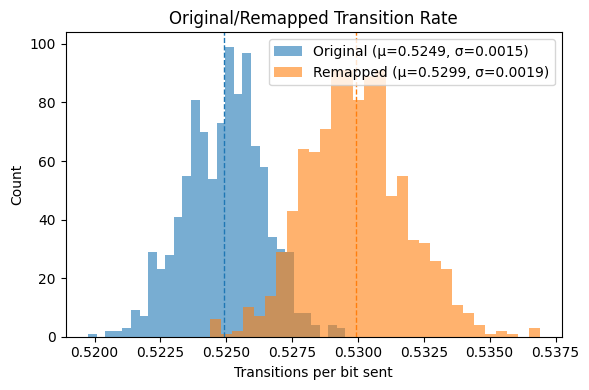

orig: 0.435163855770075
remap: 0.4095904342540903


In [37]:
# Two separate figures with mean and std annotated
import copy
import random
import matplotlib.pyplot as plt
from statistics import mean, stdev
# 7) Sampling helper: random substring from train_text
def sample_random_message(length):
    if length >= len(train_text):
        return train_text
    start = random.randrange(0, len(train_text) - length)
    return train_text[start:start+length]

def collect_trials(root, freqs, trials=1000, msg_len=1000, seed=123):
    if seed is not None:
        random.seed(seed)
    fpp_orig, fpp_remap, delta = [], [], []
    basic_tree = copy.deepcopy(root)
    basic_codebook = build_codebook(basic_tree)
    remapped_tree = remap_tree(copy.deepcopy(basic_tree), copy.deepcopy(basic_codebook), freqs)
    remapped_codebook = build_codebook(remapped_tree)
    for _ in range(trials):
        msg = sample_random_message(msg_len)

        enc_o = encode_message(msg, basic_codebook)
        fo, bo = total_flips(enc_o), len(enc_o)

        enc_r = encode_message(msg, remapped_codebook)
        fr, br = total_flips(enc_r), len(enc_r)

        fpp_orig.append(fo / bo)
        fpp_remap.append(fr / br)
        delta.append(fo - fr)
    return fpp_orig, fpp_remap, delta

# Run trials (uses basic_tree, basic_codebook, freqs)
# Baseline Huffman
train_text = readfile("WarAndPeace.txt")
K = 1000
bigram_list = top_bigrams(train_text, K)
symbol_stream = replace_bigrams(train_text, bigram_list)
freqs = Counter(symbol_stream)
basic_tree = build_huffman_tree(freqs)
basic_codebook = build_codebook(basic_tree)
fpp_o, fpp_r, delta = collect_trials(basic_tree, freqs, trials=1000, msg_len=10000, seed=123)

# Compute stats
mo, so = mean(fpp_o), stdev(fpp_o)
mr, sr = mean(fpp_r), stdev(fpp_r)
md, sd = mean(delta), stdev(delta)

# Also print them to the console
print(f"Transitions per bit sent - Original: mean={mo:.4f}, std={so:.4f}")
print(f"Transitions per bit sent - Remapped: mean={mr:.4f}, std={sr:.4f}")

# Figure 1: flips-per-bit distribution
plt.figure(figsize=(6, 4))
bins = 30
plt.hist(fpp_o, bins=bins, alpha=0.6, label=f"Original (μ={mo:.4f}, σ={so:.4f})", color="#1f77b4")
plt.hist(fpp_r, bins=bins, alpha=0.6, label=f"Remapped (μ={mr:.4f}, σ={sr:.4f})", color="#ff7f0e")
plt.axvline(mo, color="#1f77b4", linestyle="--", linewidth=1)
plt.axvline(mr, color="#ff7f0e", linestyle="--", linewidth=1)
plt.title("Original/Remapped Transition Rate")
plt.xlabel("Transitions per bit sent")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


# Check that average internal flips per bit is lower 
def avg_internal_flips_per_bit(codebook, freqs):
    num = sum(freqs[s] * internal_flips(codebook[s]) for s in freqs if s in codebook)
    den = sum(freqs[s] * len( codebook[s])           for s in freqs if s in codebook)
    return num / den

orig_cb = build_codebook(basic_tree)  # ensure consistency
remapped_root = remap_tree(copy.deepcopy(basic_tree), orig_cb, freqs)
remap_cb = build_codebook(remapped_root)

print("orig:",  avg_internal_flips_per_bit(orig_cb, freqs))
print("remap:", avg_internal_flips_per_bit(remap_cb, freqs))


Transitions per bit sent - Original: mean=0.4296, std=0.1676
Transitions per bit sent - Remapped: mean=0.3987, std=0.1687


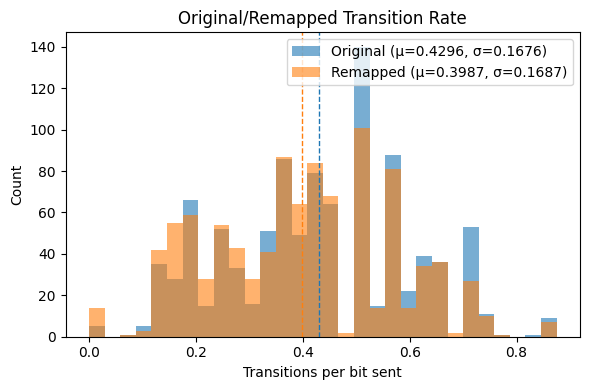

orig: 0.435163855770075
remap: 0.4095904342540903


In [ ]:
def sample_random_symbols(stream, length):
    n = len(stream)
    if length >= n:
        return stream[:] if isinstance(stream, list) else stream
    start = random.randrange(0, n - length)
    return stream[start:start+length]

def collect_trials(root, freqs, stream, trials=1000, msg_len=1, seed=123):
    if seed is not None:
        random.seed(seed)
    fpp_orig, fpp_remap, delta = [], [], []

    # build originals off this root
    basic_tree = copy.deepcopy(root)
    basic_codebook = build_codebook(basic_tree)

    # remap ONCE, using codes derived from this root
    remapped_tree = remap_tree_consistent(copy.deepcopy(basic_tree), freqs)
    remapped_codebook = build_codebook(remapped_tree)

    for _ in range(trials):
        msg = sample_random_symbols(stream, msg_len)  # use the same symbol space as freqs
        enc_o = encode_message(msg, basic_codebook)
        enc_r = encode_message(msg, remapped_codebook)
        fo, fr = total_flips(enc_o), total_flips(enc_r)
        bo, br = len(enc_o), len(enc_r)
        fpp_orig.append(fo / bo)
        fpp_remap.append(fr / br)
        delta.append(fo - fr)
    return fpp_orig, fpp_remap, delta

# remapper that always derives codes from the root (prevents mismatches)
def remap_tree_consistent(root, freqs):
    codebook = build_codebook(root)

    # group by length
    syms_by_len, codes_by_len = {}, {}
    for sym, code in codebook.items():
        L = len(code)
        syms_by_len.setdefault(L, []).append(sym)
        codes_by_len.setdefault(L, []).append(code)

    # map codes to nodes on this root
    code2node = {}
    def dfs(n, pref=""):
        if n.char is not None:
            code2node[pref] = n
            return
        dfs(n.left,  pref + "0")
        dfs(n.right, pref + "1")
    dfs(root)

    # most frequent -> fewest internal flips within each length
    for L in syms_by_len:
        syms_sorted  = sorted(syms_by_len[L],  key=lambda s: (-freqs.get(s, 0.0), s))
        codes_sorted = sorted(codes_by_len[L], key=lambda c: (internal_flips(c), c.count('1'), c))
        for sym, code in zip(syms_sorted, codes_sorted):
            code2node[code].char = sym

    return root

train_text = readfile("WarAndPeace.txt")
K = 1000
bigram_list = top_bigrams(train_text, K)
symbol_stream = replace_bigrams(train_text, bigram_list)  # list of tokens
freqs = Counter(symbol_stream)

basic_tree = build_huffman_tree(freqs)

# IMPORTANT: sample from symbol_stream, not raw train_text
fpp_o, fpp_r, delta = collect_trials(basic_tree, freqs, symbol_stream, trials=1000, msg_len=1000, seed=123)

# Compute stats
mo, so = mean(fpp_o), stdev(fpp_o)
mr, sr = mean(fpp_r), stdev(fpp_r)
md, sd = mean(delta), stdev(delta)

# Also print them to the console
print(f"Transitions per bit sent - Original: mean={mo:.4f}, std={so:.4f}")
print(f"Transitions per bit sent - Remapped: mean={mr:.4f}, std={sr:.4f}")

# Figure 1: flips-per-bit distribution
plt.figure(figsize=(6, 4))
bins = 30
plt.hist(fpp_o, bins=bins, alpha=0.6, label=f"Original (μ={mo:.4f}, σ={so:.4f})", color="#1f77b4")
plt.hist(fpp_r, bins=bins, alpha=0.6, label=f"Remapped (μ={mr:.4f}, σ={sr:.4f})", color="#ff7f0e")
plt.axvline(mo, color="#1f77b4", linestyle="--", linewidth=1)
plt.axvline(mr, color="#ff7f0e", linestyle="--", linewidth=1)
plt.title("Original/Remapped Transition Rate")
plt.xlabel("Transitions per bit sent")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


# Check that average internal flips per bit is lower 
def avg_internal_flips_per_bit(codebook, freqs):
    num = sum(freqs[s] * internal_flips(codebook[s]) for s in freqs if s in codebook)
    den = sum(freqs[s] * len(codebook[s])           for s in freqs if s in codebook)
    return num / den

orig_cb = build_codebook(basic_tree)  # ensure consistency
remapped_root = remap_tree(copy.deepcopy(basic_tree), orig_cb, freqs)
remap_cb = build_codebook(remapped_root)

print("orig:",  avg_internal_flips_per_bit(orig_cb, freqs))
print("remap:", avg_internal_flips_per_bit(remap_cb, freqs))
